# **Baixando o dataset**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Fazer o upload do token que pode ser obtido na sua conta kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Donwload do dataset com 15 classes para classificação
! kaggle datasets download chrisfilo/fruit-recognition

In [ ]:
!unzip /content/fruit-recognition.zip -d ./fruits/

# **Criando Modelos**

In [ ]:
import tensorflow as tf

**Principais Parâmetros**

Camada de convolução
*   filters = número de filtros
*   kernel_size = Dimensão dos filtros. O parâmetro pode ser passado como (n,n) ou apenas n 
*   activation = função de ativação
*   Padding = Como as bordas da imagem serão tratadas
*   Strides = Quantidade de pixels que o filtro avança. Padrão é 1 quando não utilizado
* input_shape = Dimensões das imagens. Depende do dataset utilizado

Camada de Pooling

*   Pool_size = Tamanho do Filtro
*   Strides = quantidade de pixels que o filtro avança. Padrão é 2 quando não utilizado.

Camada Flatten

*   Utilizada para converter os dados que estão em três dimensões em um array

Camada Densa

*   units = número de neurônios da camada. Na ultima camada o número de neurônio é igual ao número de classes.
*   activation = função de ativação. Comum usar softmax para proplemas multiclasse

Camada de dropout
*   Utilizada para que durante o treinamento, uma porcetagem de neurônios não seja treinada momentaneamente. Geralmente no máximo 0,5
















### **Modelo 1**

In [ ]:
def modelo_1(im_height, im_width):
    model = tf.keras.models.Sequential(name="modelo_1")

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(im_height, im_width, 3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Flatten())

    # Camada totalmente conectada
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
    print(model.summary())
    return model

### **Modelo 2**

In [ ]:
def modelo_2(im_height, im_width):
    model = tf.keras.models.Sequential(name="modelo_2")

    model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(im_height, im_width, 3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=256, activation='relu'))

    model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
    return model

### **Modelo 3**

In [ ]:
def modelo_3(im_height, im_width):
    model = tf.keras.models.Sequential(name="modelo_3")

    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(im_height, im_width, 3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
    #print(model.summary())
    return model

# **K-Fold Cross Validation**

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [ ]:
# Ler as 16000 primeiras linhas do .csv que contém o path da imagem e a classe que ela pertence
train_data = pd.read_csv('imagens_treino_avaliacao.csv', nrows=16000)
X = train_data[['filename']]
Y = train_data[['label']]

# Divisão dos dados de treino em 5 folds
kf = KFold(n_splits=5)

In [ ]:
# Utiliza algumas técnicas de data augmentation
idg = ImageDataGenerator(width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.2,
                         fill_mode='nearest',
                         horizontal_flip = True,
                         rescale=1./255, rotation_range=70)

In [ ]:
medias_precisao = []
medias_recall = []
modelos = []
save_dir = '/saved_models/'


modelos.append(modelo_1)
modelos.append(modelo_2)
modelos.append(modelo_3)

# Local para salvar os arquivos .csv com os resultados
if not os.path.exists("./resultados/"):
    os.mkdir('./resultados/')

classes = {
    0:"Apple",1:"Banana",2:"Carambola",3:"Guava",4:"Kiwi",
    5:"Mango",6:"Orange",7:"Peach",8:"Pear",9:"Persimmon",
    10:"Pitaya",11:"Plum",12:"Pomegranate",13:"Tomatoes",14:"muskmelon"
}

for count, modelo in enumerate(modelos):
    fold_var = 1
    medias_precisao.append([])
    medias_recall.append([])
    for train_index, val_index in kf.split(X,Y):
        training_data = train_data.iloc[train_index]
        validation_data = train_data.iloc[val_index]

        train_data_generator = idg.flow_from_dataframe(training_data, batch_size=64,
                                                    x_col = "filename", y_col = "label", 
                                                    class_mode = "sparse", shuffle = True, target_size=(224, 224))
        test_data_generator  = idg.flow_from_dataframe(validation_data,
                                                        x_col = "filename", y_col = "label",
                                                        class_mode = "sparse", shuffle = False, target_size=(224, 224))
        
        # Classes a que pertencem as imagens de teste ou y_test
        y_real = test_data_generator.classes

        print(test_data_generator.class_indices)

        # Cria um novo modelo com a dimensão das imagens
        model = modelo(224,224)
        # Compila o modelo
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

        # Inicia o treinamento do modelo com 3 épocas
        model.fit(train_data_generator,epochs=3)

        # Faz as predições com o fold de validação 
        # e salva as classificações em um array para usar na matriz de confusão
        y_predicted = []
        pred = model.predict(test_data_generator)
        for p in pred:
            y_predicted.append(p.argmax())

        # Arrays com valor real (y_test) e predito
        # Para criar a Matriz de confusão e as métricas é
        # possível pular essas duas linhas de código e utilizar apenas o y_real e y_predicted        
        y_true = [ classes[r] for r in y_real]
        y_pred = [ classes[p] for p in y_predicted]

        # Printa a matriz de confusão
        print(metrics.confusion_matrix(y_true, y_pred))
        
        # Printa as métricas precisão, recall e F1-score
        # É possivel passar como parâmetros y_real e y_predicted
        print(metrics.classification_report(y_true, y_pred, digits=3))

        # Relatório das métricas
        report = metrics.classification_report(y_true, y_pred, digits=3, output_dict=True)

        # Guarda os valores para gerar um gráfico com o desempenho por fold
        medias_precisao[count].append(round(report["macro avg"]["precision"], 3))
        medias_recall[count].append(round(report["macro avg"]["recall"], 3))

        df = pd.DataFrame(report).transpose()

        # Salva os resultados em um .csv
        if not os.path.exists("./resultados/"+model.name+"/"):
            os.mkdir("./resultados/"+model.name+"/")

        df.to_csv('./resultados/'+ model.name + '/folder_result_'+str(fold_var)+'.csv', index=True, header=True )

        # Limpa a session (evitar problemas com estouro de memória)
        tf.keras.backend.clear_session()

        fold_var += 1

# **Gráficos de Precisão e Recall por fold**

In [ ]:
def graficoGenerator(metricas_array):
    index = ["Fold "+str(c+1)  for c, m in enumerate(metricas_array[0])]
    metricas_dict = {}
    
    for c, metricasmodelo in enumerate(reversed(metricas_array)):
        metricas_dict["modelo "+str(len(metricas_array) - c)] = metricasmodelo

    df = pd.DataFrame(metricas_dict, index=index)
    ax = df.plot.barh(figsize=(10,7))

    ax.set_ylabel('Folds', fontsize=18)
    ax.set_xlabel('Recall', fontsize=18)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1],  loc='lower left')

    #ax.legend(loc='lower left')
    ax.grid('on', which='minor', axis='x' )
    ax.grid('off', which='major', axis='x' )

    rects = ax.patches
    lbl = [ i for i in range(15)]
    for rect, label in zip(rects, lbl):
        h = rect.get_width()
        t = rect.get_y()
        ax.text(rect.get_width() - (0.1), t, rect.get_width(), va='bottom', color='white', weight='heavy', family='cursive', size='large' )

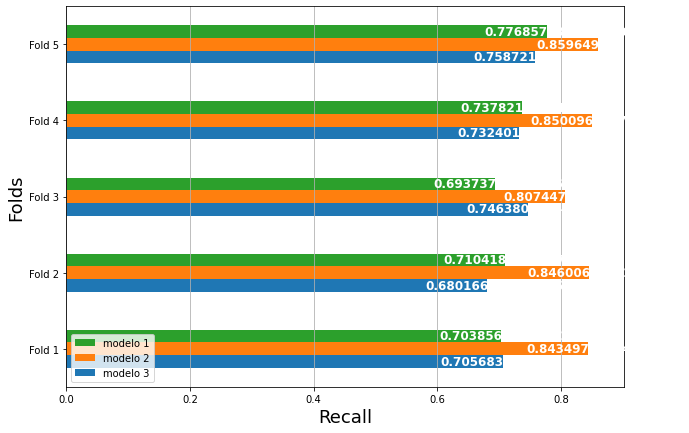

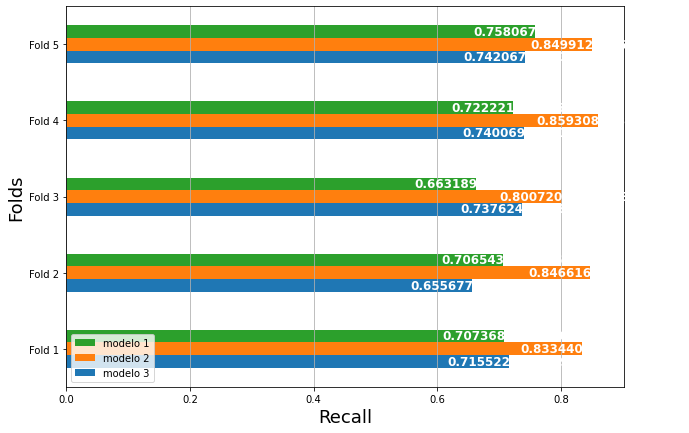

In [ ]:
graficoGenerator(medias_precisao)
graficoGenerator(medias_recall)

# **Salvando o Modelo**

In [ ]:
# Salva os modelos para verificar o tamanho em Mb
m1.save('my_model1.h5')
m2.save('my_model2.h5')
m3.save('my_model3.h5')